# Pymaceuticals Inc.
---

### Analysis

- The top four regimen with lower average tumor volume were Capomulin, Ramicane, Infubinos and Ceftamin. Of which only Infunibol showed one outlier mouse at the highest timepoint.  
- In the Capomulin's effects over the course of time indicated the performance of the regimen fluctuated from rising to decreasing the tumor volume size to ending in a rising path. Further analysis and comparison is required to determine which of  the top four regimen seems more promising for the complete disappearance of the tumor, and focus on that one regimen for an additional timepoint. 
- Based on the correlation and regression analysis, the higher the weight of the mouse, the greater the tumor volume it was. The weight of the mouse affected the volume of the tumor. 

In [1]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# CSV files path
mouse_metadata_path = "module_5_starter_code/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "module_5_starter_code/Starter_Code/Pymaceuticals/data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Merge csv files to DataFrame
pyma_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
pyma_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mice_uniqueID_count = pyma_data_complete["Mouse ID"].nunique()
mice_uniqueID_count

249

In [6]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#pyma_data_complete["Mouse ID"].unique()
pyma_data_complete[pyma_data_complete.duplicated(['Mouse ID','Timepoint'], keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [7]:
# Get all the data for the duplicate mouse ID. 

duplicated_mice_data = pyma_data_complete[pyma_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create clean DataFrame by dropping the duplicate mouse by its ID.

clean_pyma_data = pyma_data_complete[pyma_data_complete["Mouse ID"]!='g989']
clean_pyma_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Check the number of mice in the clean DataFrame.
mice_new_count = clean_pyma_data["Mouse ID"].nunique()
mice_new_count

248

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = clean_pyma_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_vol = clean_pyma_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_vol = clean_pyma_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_vol = clean_pyma_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_pyma_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
              "Median Tumor Volume":med_tumor_vol, 
              "Tumor Volume Variance":variance_tumor_vol, 
              "Tumor Volume Std. Dev.":std_tumor_vol, 
              "Tumor Volume Std. Err.":sem_tumor_vol 
             })

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

clean_pyma_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

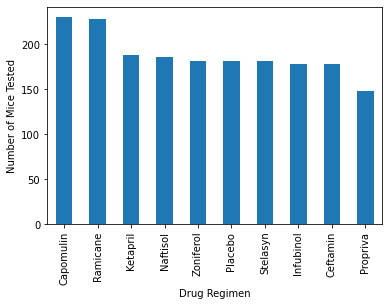

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = clean_pyma_data["Drug Regimen"].value_counts()
drug_regimen_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

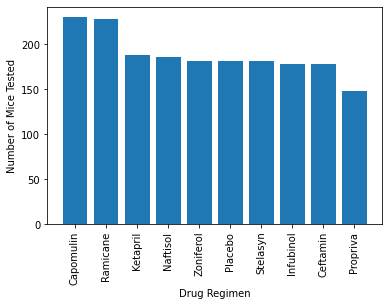

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen_count.index, drug_regimen_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

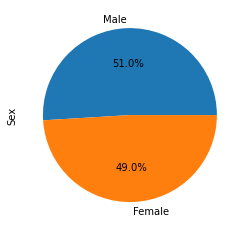

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_pyma_data["Sex"].value_counts()
gender_count.plot(kind="pie",autopct='%1.1f%%')
plt.show()


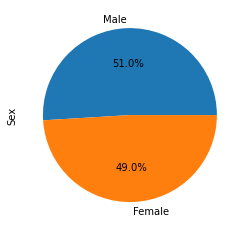

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [16]:
mouse_group = pd.DataFrame(clean_pyma_data.groupby([ "Drug Regimen", "Mouse ID"])["Timepoint"].max())
merge_df = mouse_group.merge(clean_pyma_data, on=["Drug Regimen", "Mouse ID","Timepoint"])
maxvol_df = merge_df.set_index("Drug Regimen")
maxvol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,45,38.982878,2,Female,9,22
Capomulin,b742,45,38.939633,0,Male,7,21
Capomulin,f966,20,30.485985,0,Male,16,17
Capomulin,g288,45,37.074024,1,Male,3,19
Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...
Zoniferol,q633,45,70.827796,2,Male,12,25
Zoniferol,s337,45,62.109651,4,Male,14,27
Zoniferol,w140,5,47.717952,0,Female,19,30


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create empty list to fill with tumor vol data (for plotting)

treatments_lists = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []


In [18]:
for select_drug in treatments_lists:
    sample_variable = merge_df.loc[merge_df["Drug Regimen"] == select_drug, "Tumor Volume (mm3)"]
    tumor_volumes.append(sample_variable)

    quartiles = sample_variable.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    outliers_id = sample_variable.loc[(sample_variable > upper_bound) | (sample_variable < lower_bound)]
    
    print(f"{select_drug}'s potential outliers: is: {outliers_id}")   

Capomulin's potential outliers: is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: is: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: is: Series([], Name: Tumor Volume (mm3), dtype: float64)


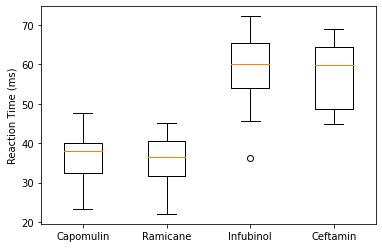

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(tumor_volumes)
plt.xticks(ticks=range(1, 5), labels=treatments_lists)
plt.show()


# Line and Scatter Plots

In [20]:
cap_only = clean_pyma_data.loc[clean_pyma_data["Drug Regimen"] == "Capomulin",:]
mouse = cap_only.loc[cap_only["Mouse ID"] == "l509",:]
mouse.reset_index

cap_vol = mouse["Tumor Volume (mm3)"]
cap_time = mouse["Timepoint"]


In [21]:
mouse_l509 = mouse
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


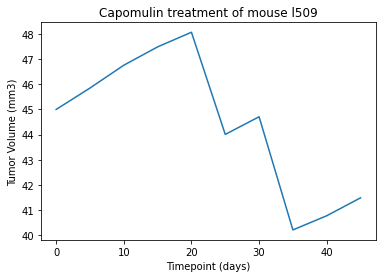

In [22]:
# Plot the charts and apply some styling
plt.plot(cap_time, cap_vol)

# Add labels to X and Y axes :: Add title
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

''

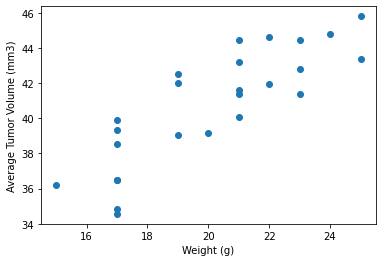

In [23]:
mean_values=clean_pyma_data.groupby("Mouse ID").mean()
cap_only = clean_pyma_data.loc[clean_pyma_data["Drug Regimen"] == "Capomulin",:]
mean_values=cap_only.groupby("Mouse ID").mean()
cap_weight = mean_values["Weight (g)"]
avg_tumor_capvol = mean_values["Tumor Volume (mm3)"]

plt.scatter(cap_weight, avg_tumor_capvol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
;

# Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

tu_slope, tu_int, tu_r, tu_p, tu_std_err  = st.linregress(cap_weight, avg_tumor_capvol)


In [25]:
tu_fit = tu_slope * cap_weight + tu_int

''

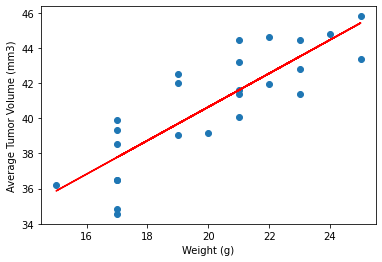

In [26]:
cap_only = clean_pyma_data.loc[clean_pyma_data["Drug Regimen"] == "Capomulin",:]
mean_values=cap_only.groupby("Mouse ID").mean()
cap_weight = mean_values["Weight (g)"]
avg_tumor_capvol = mean_values["Tumor Volume (mm3)"]

plt.scatter(cap_weight, avg_tumor_capvol)
plt.plot(cap_weight,tu_fit, "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
;